# Gradient Descent

In [6]:
from sklearn.datasets import load_boston
data = load_boston()
x,y = data['data'], data['target']
x_rm = x[:,5]

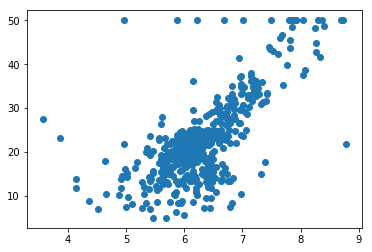

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.scatter(x_rm, y)

**Price**

In [8]:
def price(rm, k, b):
    return rm*k+b

**Gradient Descent**

In [44]:
def gradient_descent_find_k_b(trying_times, loss, partial_k, partial_b, learning_rate):
    min_loss = float('inf')
    current_k = random.random() * 200 - 100
    current_b = random.random() * 200 - 100

    for i in range(trying_times):
        price_by_k_and_b = [price(r, current_k, current_b) for r in x_rm]
        current_loss = loss(y, price_by_k_and_b)
    
        if current_loss < min_loss: # performance became better
            min_loss = current_loss
            best_k, best_b = current_k, current_b
            if i % 50 == 0:
                print('When time is : {}, get best_k: {} best_b: {}, and the loss is: {}'.format(i, best_k, best_b, min_loss))
        
        gradient_k = partial_k(x_rm, y, price_by_k_and_b)
        gradient_b = partial_b(x_rm, y, price_by_k_and_b)
        
        current_k = current_k + (-1 * gradient_k) * learning_rate
        current_b = current_b + (-1 * gradient_b) * learning_rate
    
    return best_k, best_b

## Part 1: Gradient Descent when $ loss = \frac{1}{n} \sum{(y_i - \hat{y})}^2 $

$$ \frac{\partial{loss}}{\partial{k}} = -\frac{2}{n}\sum{(y_i - \hat{y})}x_i $$

$$ \frac{\partial{loss}}{\partial{b}} = -\frac{2}{n}\sum{(y_i - \hat{y})} $$

In [42]:
def loss_1(y, y_hat):
    return sum((y_i - y_hat_i)**2 for y_i, y_hat_i in zip(list(y), list(y_hat))) / len(list(y))

def partial_k_1(x, y, y_hat):
    n  = len(y)
    gradient = 0
    for x_i, y_i, y_hat_i in zip(list(x), list(y), list(y_hat)):
        gradient += (y_i - y_hat_i) * x_i
    return -2 / n * gradient

def partial_b_1(x, y, y_hat):
    n  = len(y)
    gradient = 0
    for y_i, y_hat_i in zip(list(y), list(y_hat)):
        gradient += (y_i - y_hat_i)
    return -2 / n * gradient

When time is : 0, get best_k: 10.645788363151027 best_b: -20.854269858443104, and the loss is: 597.8620730439523
When time is : 50, get best_k: 7.044612024612561 best_b: -21.58263983115413, and the loss is: 45.71103902520882
When time is : 100, get best_k: 7.069205382433583 best_b: -21.73908108250793, and the loss is: 45.66088705510277
When time is : 150, get best_k: 7.09350477469272 best_b: -21.893652384231803, and the loss is: 45.61192685722879
When time is : 200, get best_k: 7.117513715174148 best_b: -22.046376087921544, and the loss is: 45.564130111242704
When time is : 250, get best_k: 7.14123567566162 best_b: -22.197274278003313, and the loss is: 45.51746916978301
When time is : 300, get best_k: 7.164674086440492 best_b: -22.34636877492707, and the loss is: 45.47191704247827
When time is : 350, get best_k: 7.187832336793752 best_b: -22.493681138321868, and the loss is: 45.42744738033522
When time is : 400, get best_k: 7.210713775492141 best_b: -22.639232670113568, and the loss is

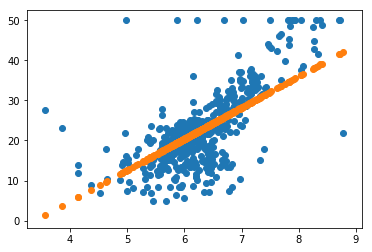

In [48]:
k,b=gradient_descent_find_k_b(2000, loss_1, partial_k_1, partial_b_1, 1e-02)
price_by_gradient_k_and_b = [price(r, k, b) for r in x_rm]
plt.scatter(x_rm, y)
plt.scatter(x_rm, price_by_gradient_k_and_b)

## Part 2: Gradient Descent when $ loss = \frac{1}{n} \sum{|y_i - \hat{y}|} $

$$ \frac{\partial{loss}}{\partial{k}} = \begin{cases}\frac{1}{n}\sum{-x_i} & y\ge\hat{y}\\\frac{1}{n}\sum{x_i}& y<\hat{y} \end{cases} $$

$$ \frac{\partial{loss}}{\partial{b}} = \begin{cases}\frac{1}{n}\sum{-1} & y\ge\hat{y}\\\frac{1}{n}\sum{1}& y<\hat{y} \end{cases}$$

In [37]:
def loss_2(y, y_hat):
    return sum(abs(y_i - y_hat_i) for y_i, y_hat_i in zip(list(y), list(y_hat))) / len(list(y))

def partial_k_2(x, y, y_hat):
    n  = len(y)
    gradient = 0
    for x_i, y_i, y_hat_i in zip(list(x), list(y), list(y_hat)):
        if y_i >= y_hat_i:
            gradient += -1 * x_i
        else:
            gradient += x_i
    return 1 / n * gradient

def partial_b_2(x, y, y_hat):
    n  = len(y)
    gradient = 0
    for y_i, y_hat_i in zip(list(y), list(y_hat)):
        if y_i >= y_hat_i:
            gradient += -1
        else:
            gradient += 1
    return 1 / n * gradient

When time is : 0, get best_k: -73.03237018514747 best_b: -48.90253643729676, and the loss is: 530.4170878167902
When time is : 50, get best_k: -69.89005299147163 best_b: -48.40253643729686, and the loss is: 510.1687731254483
When time is : 100, get best_k: -66.7477357977958 best_b: -47.90253643729696, and the loss is: 489.9204584341065
When time is : 150, get best_k: -63.60541860411996 best_b: -47.40253643729706, and the loss is: 469.6721437427651
When time is : 200, get best_k: -60.463101410444125 best_b: -46.90253643729716, and the loss is: 449.42382905142273
When time is : 250, get best_k: -57.32078421676829 best_b: -46.40253643729726, and the loss is: 429.175514360081
When time is : 300, get best_k: -54.17846702309245 best_b: -45.90253643729736, and the loss is: 408.9271996687392
When time is : 350, get best_k: -51.036149829416615 best_b: -45.40253643729746, and the loss is: 388.67888497739733
When time is : 400, get best_k: -47.89383263574078 best_b: -44.902536437297556, and the l

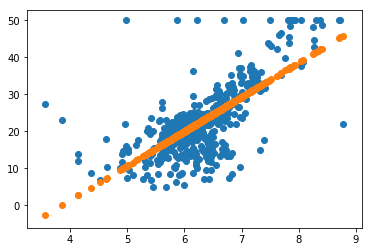

In [47]:
k,b=gradient_descent_find_k_b(2000, loss_2, partial_k_2, partial_b_2, 1e-02)
price_by_gradient_k_and_b = [price(r, k, b) for r in x_rm]
plt.scatter(x_rm, y)
plt.scatter(x_rm, price_by_gradient_k_and_b)

# Dynamic Programming

### Rob Cutting Problem

In [1]:
rob_price = [0, 1, 5, 8, 9, 10, 17, 17, 20, 24, 30]

In [2]:
def rob_profit_r(price, length):
    #return max([price[length]] +[rob_profit_r(price, i) + rob_profit_r(price, length-i) for i in range(1, length)])
    if length <= 0:
        return 0
    max_profit = -1
    for i in range(1, length+1):
        max_profit = max(max_profit, price[i] + rob_profit_r(price, length-i))
    return max_profit

In [3]:
def rob_profit(price, length):
    new_price = [price[i] if i < len(price) else 0 for i in range(length+1)]
    return rob_profit_r(new_price, length)

In [4]:
rob_profit(rob_price, 18)

52

In [20]:
def rob_profit_m(price, length, result):
    if length == 0:
        return 0
    if result[length] == 0:
        profit = -1
        for i in range(1, length+1):
            profit = max(profit, price[i] + rob_profit_m(price, length-i, result))
        result[length] = profit
    return result[length]

def rob_profit_memo(price, length):
    new_price = [price[i] if i < len(price) else 0 for i in range(length+1)]
    result = [0 for i in range(length+1)]
    return rob_profit_m(new_price, length, result)

In [21]:
rob_profit_memo(rob_price, 18)

52

In [22]:
def cut_rod_bottom_up(price, length):
    results = [0 for i in range(length+1)]

    for j in range(1, length+1):
        p = -1
        for i in range(1, j+1):
            p = max(p, price[i] + results[j-i])
        results[j] = p
    return results[length]

def rob_profit_bottom_up(price, length):
    new_price = [price[i] if i < len(price) else 0 for i in range(length+1)]
    return cut_rod_bottom_up(new_price, length)

In [23]:
rob_profit_bottom_up(rob_price, 18)

52

In [26]:
def cut_rod_bottom_up_with_solution(price, length, solution):
    results = [0 for i in range(length+1)]

    for j in range(1, length+1):
        p = -1
        for i in range(1, j+1):
            if p < (price[i] + results[j-i]):
                p = price[i] + results[j-i]
                solution[j] = i
        results[j] = p
    return results[length]

def rob_profit_bottom_up_with_solution(price, length):
    new_price = [price[i] if i < len(price) else 0 for i in range(length+1)]
    solution = {}
    p = cut_rod_bottom_up_with_solution(new_price, length, solution)
    n = length
    while n > 0:
        print(solution[n])
        n = n - solution[n]

In [27]:
rob_profit_bottom_up_with_solution(rob_price, 18)

2
6
10


## Part 3: Finish the Solution Parse Part of Edit-Distance

In [32]:
#@lru_cache(maxsize=2**10)
solution = {}
def edit_distance(string1, string2):
    
    if len(string1) == 0: return len(string2)
    if len(string2) == 0: return len(string1)
    
    tail_s1 = string1[-1]
    tail_s2 = string2[-1]
    
    candidates = [
        (edit_distance(string1[:-1], string2) + 1, 'DEL {}'.format(tail_s1)),  # string 1 delete tail
        (edit_distance(string1, string2[:-1]) + 1, 'ADD {}'.format(tail_s2)),  # string 1 add tail of string2
    ]
    
    if tail_s1 == tail_s2:
        both_forward = (edit_distance(string1[:-1], string2[:-1]) + 0, '')
    else:
        both_forward = (edit_distance(string1[:-1], string2[:-1]) + 1, 'SUB {} => {}'.format(tail_s1, tail_s2))

    candidates.append(both_forward)
    
    min_distance, operation = min(candidates, key=lambda x: x[0])
    
    solution[(string1, string2)] = operation 
    
    return min_distance

In [36]:
print(edit_distance('hero', 'hello'))
for i in solution:
    print(i, solution[i])

2
('h', 'h') 
('h', 'he') ADD e
('h', 'hel') ADD l
('h', 'hell') ADD l
('h', 'hello') ADD o
('he', 'h') DEL e
('he', 'he') 
('he', 'hel') ADD l
('he', 'hell') ADD l
('he', 'hello') ADD o
('her', 'h') DEL r
('her', 'he') DEL r
('her', 'hel') SUB r => l
('her', 'hell') ADD l
('her', 'hello') ADD o
('hero', 'h') DEL o
('hero', 'he') DEL o
('hero', 'hel') DEL o
('hero', 'hell') SUB o => l
('hero', 'hello') 


In [49]:
def parse_edit_distance_solution(string1, string2, n, solution):
    while n >= 0:
        operation = solution[(string1, string2)]
        if operation != '':
            print(string1, string2, operation)
        if operation[0:3] == 'ADD':
            string2 = string2[:-1]
        elif operation[0:3] == 'DEL':
            string1 = string1[:-1]
        else:
            string1 = string1[:-1]
            string2 = string2[:-1]
        n -= 1

In [50]:
parse_edit_distance_solution('hero', 'hello', 2, solution)

her hell ADD l
her hel SUB r => l


## Part 5-1: review machine learning

1. Why do we use Derivative / Gredient to fit a target function?

Ans: 通过梯度下降可以找到正确的方向，能够更快找到目标

2. In the words 'Gredient Descent', what's the Gredient and what's the Descent?

Ans: Gradient 就是偏导数， Descent使目标函数达到最小值

3. What's the advantages of the 3rd gradient descent method compared to the previous methods?

Ans:速度快

4. Using the simple words to describe: What's the machine leanring.

Ans:让机器从数据中学习拟合函数的参数，从而找到拟合函数

## Part 5-2: review Dynamic Programming

1. Why do we need dynamic programming? What's the difference of dynamic programming and previous talked search problme?

Ans: 减少计算，可以更快的获得结果。动态规划与前面搜索问题的不同是：动态规划把子问题的结果记录下来，下次使用时可以直接使用不需要重复计算了，节省了大量的时间。

2. Why do we still need dynamic programming? Why not we train a machine learning to fit a function which could get the right answer based on inputs?

Ans: 不同的问题有不同的方法去解决，没有一种方法可以解决所有问题。对于有些问题使用动态规划可以快速得到正确的解。
使用机器学习虽然可以根据已知的输入拟合一个函数，但是这个过程会很慢，而且拟合的函数不一定正确，也不能适用未来的情况。我们应该使用正确的方法去解决想对应的问题。

3. Can you catch up at least 3 problems which could solved by Dynamic Programming?

Ans: 1. 背包问题. 2. 最短路径问题. 3. 编辑距离

4. Can you catch up at least 3 problems wich could sloved by Edit Distance?

Ans: 1. 拼写纠错. 2. 两个词向量的相似度. 3. DNA序列匹配

5. Please summarize the three main features of Dynamic Programming, and make a concise explain for each feature.

Ans: 最优子结构性质。如果问题的最优解所包含的子问题的解也是最优的，我们就称该问题具有最优子结构性质（即满足最优化原理）。最优子结构性质为动态规划算法解决问题提供了重要线索。
无后效性。即子问题的解一旦确定，就不再改变，不受在这之后、包含它的更大的问题的求解决策影响。
子问题重叠性质。子问题重叠性质是指在用递归算法自顶向下对问题进行求解时，每次产生的子问题并不总是新问题，有些子问题会被重复计算多次。动态规划算法正是利用了这种子问题的重叠性质，对每一个子问题只计算一次，然后将其计算结果保存在一个表格中，当再次需要计算已经计算过的子问题时，只是在表格中简单地查看一下结果，从而获得较高的效率。

6. What's the disadvantages of Dynamic Programming? (You may need search by yourself in Internet)

Ans：动态规划的缺点：需要把所有子问题的解都存储下来，需要占用大量的空间。

## Part 6: Preparation of Project-01

Using python Flask or Bottle to finish your first simple web app:

https://bottlepy.org/

Learn what's the SQL, and try some simple SQL operations:

https://www.w3schools.com/sql/sql_intro.asp

Learn what's the HTML ( ONLY need to know the basic things)

https://getbootstrap.com/; https://www.w3schools.com/html/

## (Optinal) Finish the k-person-salesman problem:

In [4]:
import random
import matplotlib.pylab as plt

latitudes = [random.randint(-100, 100) for _ in range(20)]
longitude = [random.randint(-100, 100) for _ in range(20)]

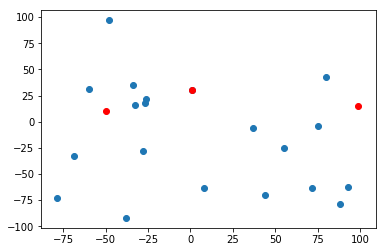

In [5]:
chosen_p = (-50, 10)
chosen_p2 = (1, 30)
chosen_p3 = (99, 15)

plt.scatter(latitudes, longitude)
plt.scatter([chosen_p[0]], [chosen_p[1]], color='r')
plt.scatter([chosen_p2[0]], [chosen_p2[1]], color='r')
plt.scatter([chosen_p3[0]], [chosen_p3[1]], color='r')